<a href="https://colab.research.google.com/github/dhhieu397/Techniques-in-Deep-Learning/blob/master/2_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####RNN: Mô hình nơ ron hồi quy
+ 1 từ đơn lẻ, k có ý nghĩa; từ đó và mqh giữa các từ xq-> hiểu đc ngũ nghĩa của câu đó; ngoài ra để hiểu ngữ nghĩa 1 câu cần dựa vào cấu trucs ngữ pháp của câu đó
+ Học đc mqh giữa từ đó với các từ xq -> từ đó hiểu ngữ nghĩa của câu
+ RNN theo cơ chế liên kết từ liền trước vói các từ ở hiện tại để tạo ra mối liên hệ xâu chuỗi
+ RNN: đầu vào xt, đàu ra ht, thông qua mang no ron A ở giữa (sao chép nhiều làn của cùng 1 cấu trúc để tạo ra các thành phần kết nối liền mạch vói nhau theo mô hình chuỗi)(vòng lặp) Note: Đầu ra của vòng lặp trước chính là đầu vào của vòng lặp sau.
####Hạn chế của RNN
+ Chỉ có đc sự liên kết giữa từ trước và từ hiện tại, tuy nhiên mạng nơ ron hồi quy này, chưa thể học đc sự phụ thuộc dài hạn ( để ứng dụng cho bài toán sinh từ) VD: trong ngữ cảnh học sinh đến trường, bống đến trg, nay trời mưa không mang áo mưa -> đoán đc event là bị "ướt". Cần LSTM (để học đc sự phụ thuộc trong dài hạn (long-term dependencies).
###LSTM🇰
+ gồm 3 hàm sigmoid và 1 hàm tanh
+ Bước 1: quyết định xem thông tin nào nên đc giữ, thônhg tin nào nên loại bỏ, qua hàm sigmoid-> output xác suất (0, 1); 0: bỏ qua thông tin; 1: giữ toàn bộ thông tin đó
+ Bước 2:  Bước tiếp theo chúng ta sẽ quyết định loại thông tin nào sẽ được lưu trữ trong ô trạng thái (cell state). Bước này bao gồm 2 phần. Phần đầu tiên là một tầng ẩn của hàm sigmoid được gọi là tầng cổng vào (input gate layer) quyết định giá trị bao nhiêu sẽ được cập nhật. Tiếp theo, tầng ẩn hàm tanh sẽ tạo ra một véc tơ của một giá trị trạng thái mới 
 mà có thể được thêm vào trạng thái. Tiếp theo kết hợp kết quả của 2 tầng này để tạo thành một cập nhật cho trạng thái.

Trong ví dụ của mô hình ngôn ngữ, chúng ta muốn thêm loại của một chủ ngữ mới vào ô trạng thái để thay thế phần trạng thái cũ muốn quên đi.

####2. Thực hành mô hình sinh từ tự động



In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
cd "/content/gdrive/MyDrive/Cert TensorFlow_ Bá Ngọc/phamdinhkhanh.github_Blog"

/content/gdrive/MyDrive/Cert TensorFlow_ Bá Ngọc/phamdinhkhanh.github_Blog


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import os

filename = "/content/gdrive/MyDrive/Cert TensorFlow_ Bá Ngọc/phamdinhkhanh.github_Blog/wonderland.txt"
raw_text = open(filename).read().lower()
chars = sorted(list(set(raw_text)))
print(chars)
char_to_int = dict((c, i) for i, c in enumerate(chars))
print("Number of letter: ", len(char_to_int))
print(char_to_int)
 


['\n', ' ', '!', '"', "'", '(', ')', '*', ',', '-', '.', '0', '3', ':', ';', '?', '[', ']', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of letter:  46
{'\n': 0, ' ': 1, '!': 2, '"': 3, "'": 4, '(': 5, ')': 6, '*': 7, ',': 8, '-': 9, '.': 10, '0': 11, '3': 12, ':': 13, ';': 14, '?': 15, '[': 16, ']': 17, '_': 18, '`': 19, 'a': 20, 'b': 21, 'c': 22, 'd': 23, 'e': 24, 'f': 25, 'g': 26, 'h': 27, 'i': 28, 'j': 29, 'k': 30, 'l': 31, 'm': 32, 'n': 33, 'o': 34, 'p': 35, 'q': 36, 'r': 37, 's': 38, 't': 39, 'u': 40, 'v': 41, 'w': 42, 'x': 43, 'y': 44, 'z': 45}


In [ ]:
import string
string.ascii_lowercase
chars_new = list(string.ascii_lowercase) + ['0', '.', ',', ' ', '!', '?', 'unk']
#print(chars_new)
chars_to_int = dict((v, k) for k, v in enumerate(chars_new))
int_to_chars = dict((k, v) for k, v in enumerate(chars_new))
print('character to int:', chars_to_int)
print('int to character:', int_to_chars)

character to int: {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '0': 26, '.': 27, ',': 28, ' ': 29, '!': 30, '?': 31, 'unk': 32}
int to character: {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '0', 27: '.', 28: ',', 29: ' ', 30: '!', 31: '?', 32: 'unk'}


In [ ]:
n_chars = len(raw_text)
n_vocab = len(chars_new)
print('Total characters: ', n_chars)
print('Total Vocab: ', n_vocab)

Total characters:  148574
Total Vocab:  33


In [ ]:
def _encode_sen(text):
    text = text.lower()
    sen_vec = []
    for let in text:
        if let in chars_new[:-1]:
            idx = chars_to_int[let]
        else:
            idx = chars_to_int['unk']
        sen_vec.append(idx)
    return sen_vec

x_test = _encode_sen('Alice is a wonderful story. #')
print(x_test)

[0, 11, 8, 2, 4, 29, 8, 18, 29, 0, 29, 22, 14, 13, 3, 4, 17, 5, 20, 11, 29, 18, 19, 14, 17, 24, 27, 29, 32]


In [ ]:
def _decode_sen(vec):
    text = []
    for i in vec:
        let = int_to_chars[i]
        text.append(let)
    text = ''.join(text)
    return text

_decode_sen(x_test)

'alice is a wonderful story. unk'

In [ ]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    # Lấy ra 100 kí tự liền trước
    seq_in = raw_text[i:i + seq_length]
    # Lấy ra kí tự liền sau 100 kí tự đó
    seq_out = raw_text[i + seq_length]
    dataX.append(_encode_sen(seq_in))
    dataY.append(_encode_sen(seq_out)[0])
    n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  148474


In [ ]:
import numpy as np
# reshape X to be [samples, time steps, features]
X_train = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X_train = X_train / float(n_vocab)
# one hot encode the output variable
y_train = np_utils.to_categorical(dataY)
print('X [samples, time steps, features] shape: ', X_train.shape)
print('Y shape: ', y_train.shape)

print(type(X_train))
print(type(y_train))



X [samples, time steps, features] shape:  (148474, 100, 1)
Y shape:  (148474, 33)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7f53b8c76d90>,
 [Text(0, 0, 'a'),
  Text(0, 0, 'b'),
  Text(0, 0, 'c'),
  Text(0, 0, 'd'),
  Text(0, 0, 'e'),
  Text(0, 0, 'f'),
  Text(0, 0, 'g'),
  Text(0, 0, 'h'),
  Text(0, 0, 'i'),
  Text(0, 0, 'j'),
  Text(0, 0, 'k'),
  Text(0, 0, 'l'),
  Text(0, 0, 'm'),
  Text(0, 0, 'n'),
  Text(0, 0, 'o'),
  Text(0, 0, 'p'),
  Text(0, 0, 'q'),
  Text(0, 0, 'r'),
  Text(0, 0, 's'),
  Text(0, 0, 't'),
  Text(0, 0, 'u'),
  Text(0, 0, 'v'),
  Text(0, 0, 'w'),
  Text(0, 0, 'x'),
  Text(0, 0, 'y'),
  Text(0, 0, 'z'),
  Text(0, 0, '0'),
  Text(0, 0, '.'),
  Text(0, 0, ','),
  Text(0, 0, ' '),
  Text(0, 0, '!'),
  Text(0, 0, '?')])

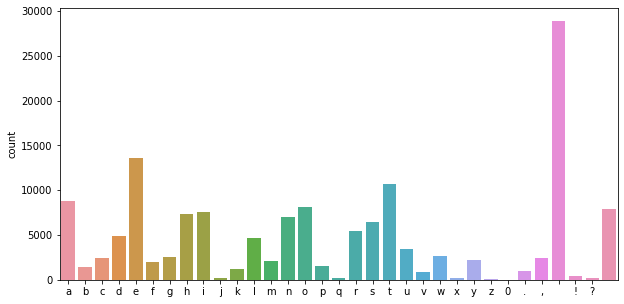

In [ ]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
sn.countplot(np.array(dataY))
plt.xticks(np.arange(32),np.array(chars_new))


In [ ]:
#Mô hình LSTM
model = Sequential()
model.add(LSTM(256, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 33)                8481      
                                                                 
Total params: 272,673
Trainable params: 272,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
filepath = 'weights-improvement-{epoch:02d}-{loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
callback_list = [checkpoint]
model.fit(X_train, y_train, epochs = 5, batch_size = 128, validation_split=0.33, callbacks = callback_list, verbose = 1)

Epoch 1/5
778/778 [==============================] - 562s 720ms/step - loss: 2.8878 - accuracy: 0.1973 - val_loss: 2.8000 - val_accuracy: 0.1951
Epoch 2/5
778/778 [==============================] - 562s 722ms/step - loss: 2.7352 - accuracy: 0.2172 - val_loss: 2.6926 - val_accuracy: 0.2319
Epoch 3/5
778/778 [==============================] - 567s 729ms/step - loss: 2.6520 - accuracy: 0.2436 - val_loss: 2.6207 - val_accuracy: 0.2496
Epoch 4/5
778/778 [==============================] - 563s 724ms/step - loss: 2.5924 - accuracy: 0.2595 - val_loss: 2.5739 - val_accuracy: 0.2642
Epoch 5/5
778/778 [==============================] - 563s 724ms/step - loss: 2.5424 - accuracy: 0.2737 - val_loss: 2.5284 - val_accuracy: 0.2828


In [ ]:
#Dự báo kết quả từ tiếp theo từ một tập hợp kí tự đầu vào
import numpy as np
base_word = 'Alice was beginning to get very tired of sitting by her sister on the bank'

def _predict_let(text, len_sen = 1):
    text_for = []
    for i in range(len_sen):
        x_input = np.array(_encode_sen(text)[-100:])/float(n_vocab)
        if x_input.shape[0] < 100:
            x_input = np.concatenate((np.zeros(100-x_input.shape[0]), x_input), axis = 0)
        x_input = np.expand_dims(np.expand_dims(x_input, -1), 0)
        y_prob = model.predict(x_input)
        y_let = int_to_chars[np.argmax(y_prob, axis = 1)[0]]
        text = text + y_let
    return text[len_sen:]

_predict_let(base_word, 100)